In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import steplib as msl

In [13]:
meter_df = pd.read_csv("DataGathering/output.csv")
state_df = pd.read_csv('output.csv')
steps_df = pd.read_csv("DataGathering/steps.csv")

In [14]:
start = 0
end = len(meter_df["datetime"])

In [15]:
def chart(data_in, states):
    x=pd.to_datetime(meter_df['datetime'])[start:end]
    y=data_in [start:end]
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.title(data_in.name)
    plt.xlabel('datetime')
    plt.ylabel('accx')
    #show x label every 800
    plt.xticks(x[::800])
    plt.xticks(rotation=90)
    #add rectangles

    plt.show()

In [16]:
def chart2(data_in):
    x=pd.to_datetime(meter_df['datetime'])[start:end]
    y=data_in[start:end]
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.xlabel('datetime')
    plt.ylabel('accx')
    #show x label every 800
    plt.xticks(x[::800])
    plt.xticks(rotation=90)
    #add rectangles
    for i in range(len(steps_df.iloc[:,0])):
        plt.axvline(x = pd.to_datetime(steps_df.iloc[:,0][i]), color = 'b', label = 'axvline - full height')
    plt.show()

In [17]:
steps_df.iloc[:,0][0]

'2023-11-21 23:51:10.394'

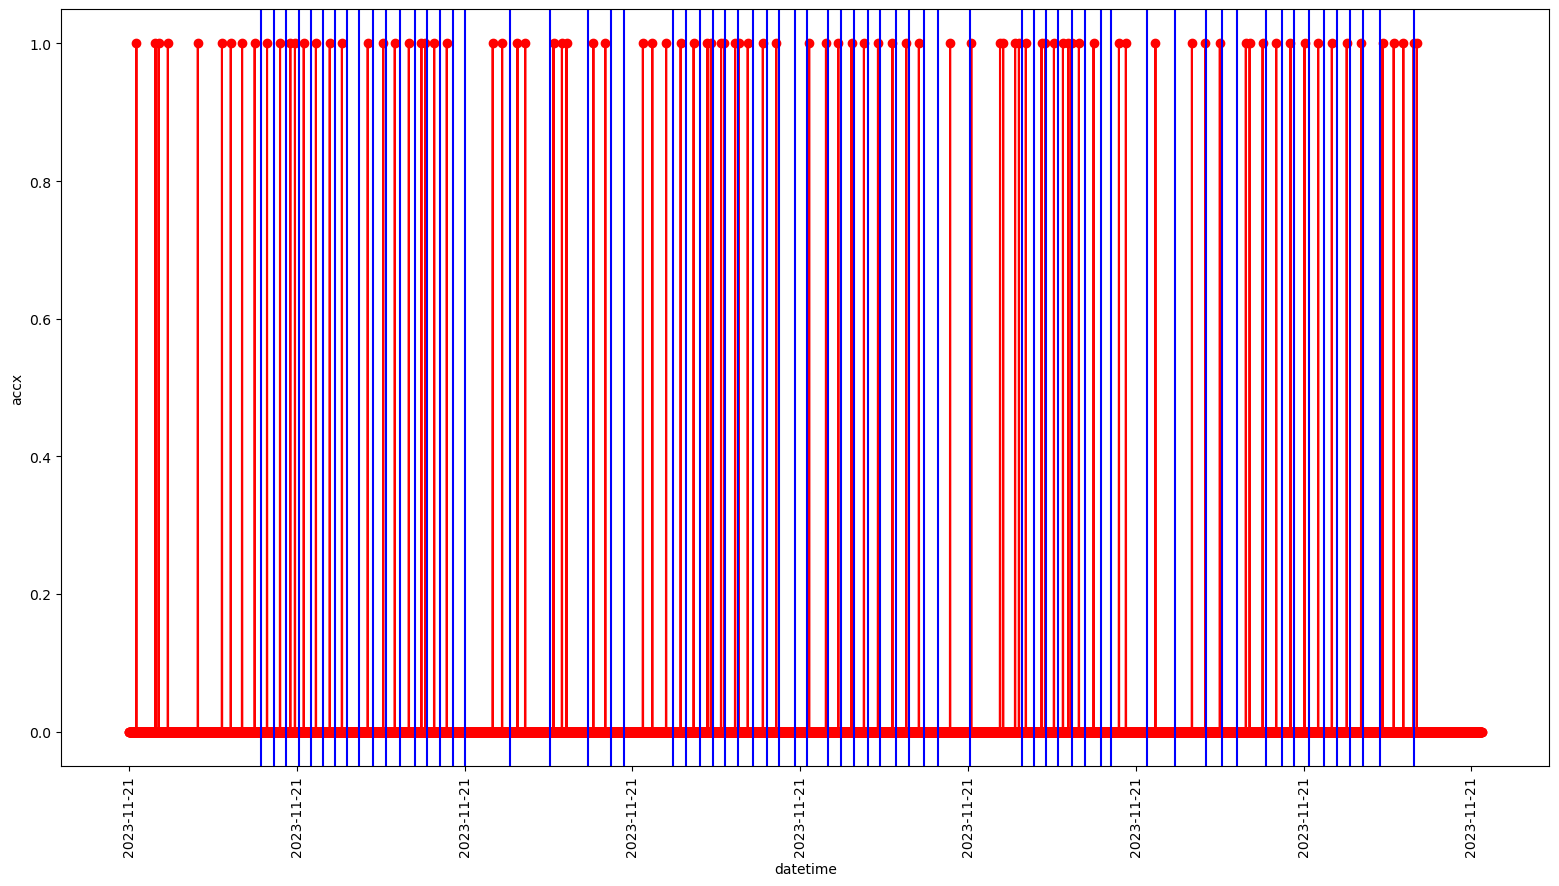

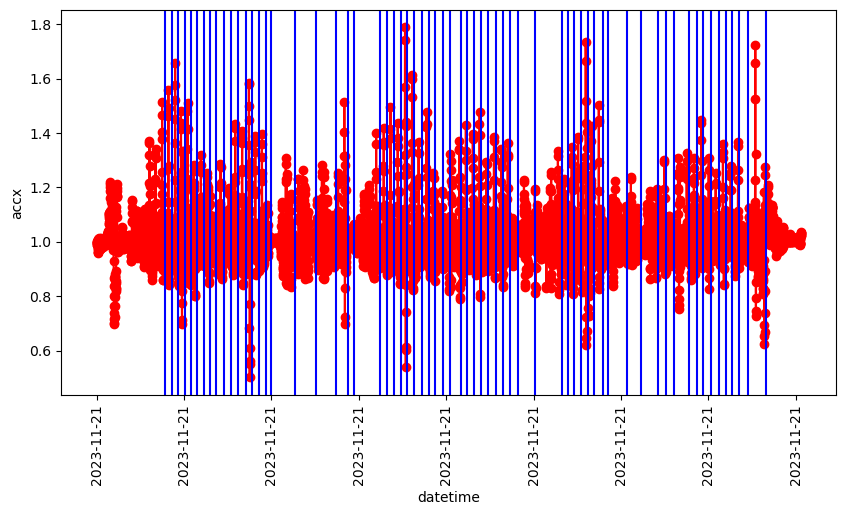

In [18]:
data = meter_df['accx']**2 + meter_df['accy']**2 + meter_df['accz']**2
data = data.apply(lambda x: x**0.5)
%matplotlib inline
chart2(data)


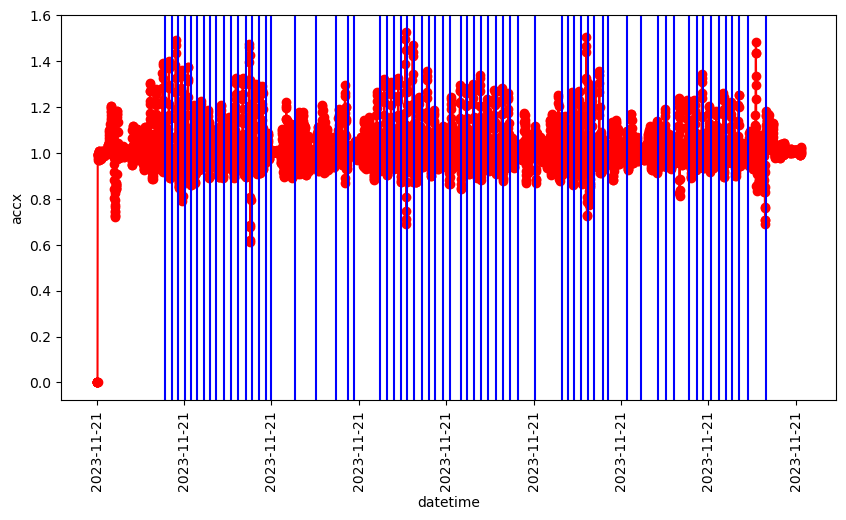

In [19]:
#apply filter 0.0158467315853596	0.0457943754888393	0.121235976281198	0.200244477464560	0.233756878360087	0.200244477464560	0.121235976281198	0.0457943754888393	0.0158467315853596
data = msl.apply_filter(data, [0.0158467315853596,0.0457943754888393,0.121235976281198,0.200244477464560,0.233756878360087,0.200244477464560,0.121235976281198,0.0457943754888393,0.0158467315853596])
chart2(data)

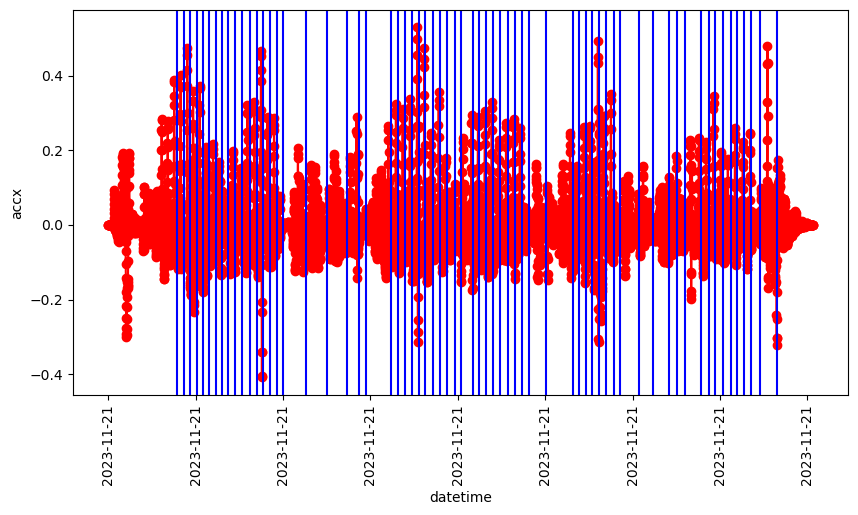

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09475245008588948, 0.08175074937925826, 0.06932555299565636, 0.0568035763432791, 0.0439922721085584, 0.031068540091109608, 0.018973442001374168, 0.008395519952221106, -0.0009216832582056439, -0.009960829336132633, -0.009878815374919716, -0.011056392370033521, -0.012572258420542218, -0.013320623340994243, -0.012519741392209054, -0.010041460038068181, -0.00643698620647086, -0.0028828584332707954, -0.0006536143840066818, -0.000744362174730554, -0.003193676890961984, -0.007257328954378257, -0.011517770342830249, -0.014557183227610309, -0.015863575431028176, -0.016073678280390996, -0.016416172437421075, -0.01759040634386118, -0.019373459665498517, -0.02110704892623151, -0.02253989464241883, -0.023853028344216914, -0.02537863788383014, -0.02718731301935293, -0.029230183486689612, -0.031040790733737146, -0.03196333717262759, -0.03137200588998

In [20]:
data = msl.mean_difference(data, 50)
chart2(data)
print(data)

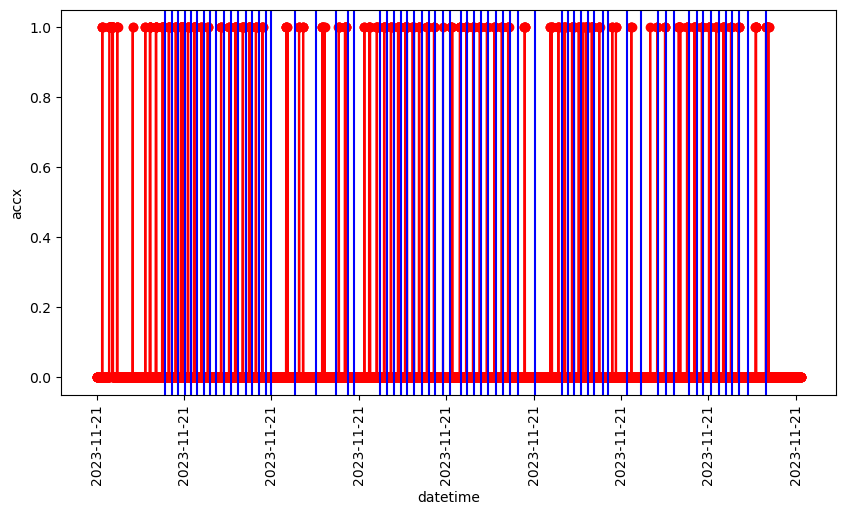

In [21]:
data = msl.detect_outliers(data, 1.2)
chart2(data)

In [23]:
%matplotlib inline
data = msl.post_processing(data, 200, 75)
chart2(data)